E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories".

Number of Instances: 50425

Number of classes: 4

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('ecommerceDataset.csv',names=['Category', 'Description'])

In [ ]:
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df.describe()

,Category,Description
count,50425,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [ ]:
df['Category'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Category, dtype: int64

In [ ]:
print(pd.Series({"Number of observations with missing values": len(df) - len(df.dropna()),
                 "Number of duplicate observations": df.duplicated().sum()}).to_string())

Number of observations with missing values        1
Number of duplicate observations              22622


In [ ]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df['Category'].value_counts()

Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: Category, dtype: int64

## Exploratory Data Analysis

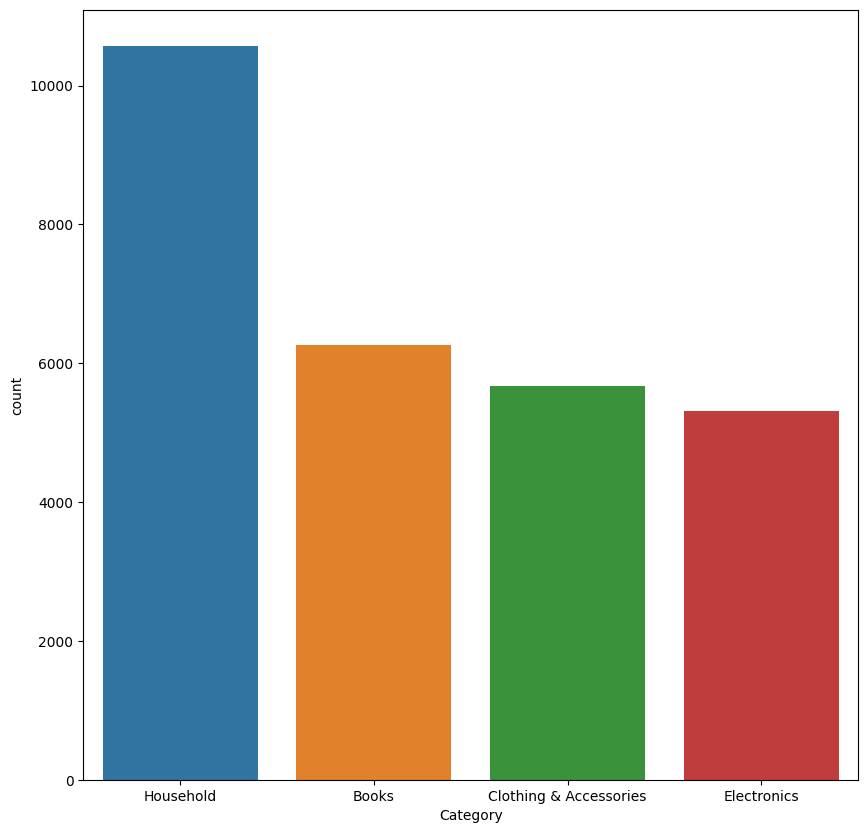

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df["Category"],  data=df, order = df["Category"].value_counts().index )

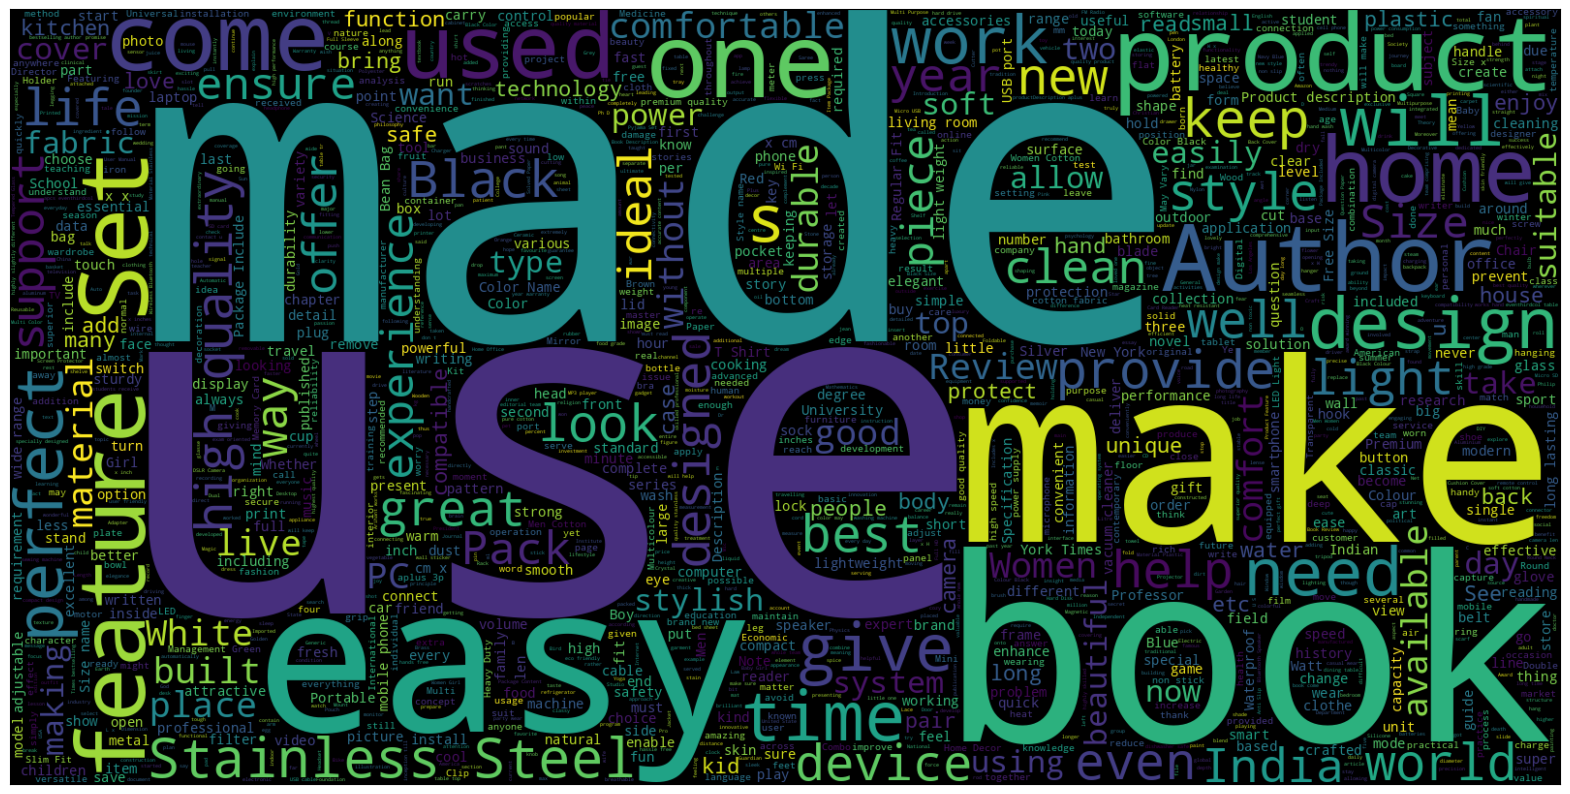

In [ ]:
def wordcloud_vis(df, col_name):

    plt.figure(figsize=(20, 20))
    wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df[col_name]))
    plt.imshow(wc, interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.show()
wordcloud_vis(df, 'Description')

## Text Preprocessing

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize


In [ ]:
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}   # Create a dictionary where each punctuation character is mapped to an empty string for removal
    # Preserve spaces and single quotes in the text
    delete_dict[' '] = ' '
    delete_dict["'"] = "'"
    table = str.maketrans(delete_dict)   # Create a translation table for removing special characters
    text1 = text.translate(table)    # Remove all punctuation based on the translation table
    textArr= text1.split()   # Split the text into words
    textArr = re.sub(r'[\.;:,\?\"\'\/]',' ', text1)    # Use regular expressions to remove any additional unwanted characters (e.g., punctuation within words)
    text2 = ''.join([w for w in textArr])    # Join the cleaned words into a final string without extra characters
    # Return the cleaned text
    return text2

In [ ]:
df['Description'] = df['Description'].apply(clean_text)
df['Description']

0        Paper Plane Design Framed Wall Hanging Motivat...
1        SAF  Floral  Framed Painting Wood 30 inch x 10...
2        SAF  UV Textured Modern Art Print Framed  Pain...
3        SAF Flower Print Framed Painting Synthetic 135...
4        Incredible Gifts India Wooden Happy Birthday U...
                               ...                        
27797    Micromax Bharat 5 Plus Zero impact on visual d...
27798    Microsoft Lumia 550 8GB 4G Black Microsoft lum...
27799    Microsoft Lumia 535 Black 8GB ColourBlack   Pr...
27800    Karbonn Titanium Wind W4 White Karbonn Titaniu...
27801    Nokia Lumia 530 Dual SIM Grey ColourGrey   Pro...
Name: Description, Length: 27802, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['tokenize'] = df['Description'].apply(word_tokenize)  # Tokenize the text into individual words
df.head()

,Category,Description,tokenize
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ..."
1,Household,SAF Floral Framed Painting Wood 30 inch x 10...,"[SAF, Floral, Framed, Painting, Wood, 30, inch..."
2,Household,SAF UV Textured Modern Art Print Framed Pain...,"[SAF, UV, Textured, Modern, Art, Print, Framed..."
3,Household,SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt..."


In [ ]:
df['lower'] = df['tokenize'].apply(lambda x: [word.lower() for word in x])  # Convert all tokens to lowercase
df.head()

,Category,Description,tokenize,lower
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ..."
1,Household,SAF Floral Framed Painting Wood 30 inch x 10...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch..."
2,Household,SAF UV Textured Modern Art Print Framed Pain...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed..."
3,Household,SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt..."


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))  # Remove stopwords from tokens
df['stop_words_removed'] = df['lower'].apply(lambda x: " ".join(i for i in x if i not in stop_words))

df.head()

,Category,Description,tokenize,lower,stop_words_removed
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ...",paper plane design framed wall hanging motivat...
1,Household,SAF Floral Framed Painting Wood 30 inch x 10...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch...",saf floral framed painting wood 30 inch x 10 i...
2,Household,SAF UV Textured Modern Art Print Framed Pain...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed...",saf uv textured modern art print framed painti...
3,Household,SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet...",saf flower print framed painting synthetic 135...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt...",incredible gifts india wooden happy birthday u...


In [ ]:
st = PorterStemmer()
df['stemming'] = df['stop_words_removed'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

,Category,Description,tokenize,lower,stop_words_removed,stemming
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ...",paper plane design framed wall hanging motivat...,paper plane design frame wall hang motiv offic...
1,Household,SAF Floral Framed Painting Wood 30 inch x 10...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch...",saf floral framed painting wood 30 inch x 10 i...,saf floral frame paint wood 30 inch x 10 inch ...
2,Household,SAF UV Textured Modern Art Print Framed Pain...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed...",saf uv textured modern art print framed painti...,saf uv textur modern art print frame paint syn...
3,Household,SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet...",saf flower print framed painting synthetic 135...,saf flower print frame paint synthet 135 inch ...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt...",incredible gifts india wooden happy birthday u...,incred gift india wooden happi birthday uniqu ...


In [ ]:
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()  # Initialize a WordNet Lemmatizer object
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)  # Tokenize each sentence into words
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['lemmatized'] = df['stemming'].apply(lemmatize_text)
df.head()

,Category,Description,tokenize,lower,stop_words_removed,stemming,lemmatized
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ...",paper plane design framed wall hanging motivat...,paper plane design frame wall hang motiv offic...,paper plane design frame wall hang motiv offic...
1,Household,SAF Floral Framed Painting Wood 30 inch x 10...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch...",saf floral framed painting wood 30 inch x 10 i...,saf floral frame paint wood 30 inch x 10 inch ...,saf floral frame paint wood 30 inch x 10 inch ...
2,Household,SAF UV Textured Modern Art Print Framed Pain...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed...",saf uv textured modern art print framed painti...,saf uv textur modern art print frame paint syn...,saf uv textur modern art print frame paint syn...
3,Household,SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet...",saf flower print framed painting synthetic 135...,saf flower print frame paint synthet 135 inch ...,saf flower print frame paint synthet 135 inch ...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt...",incredible gifts india wooden happy birthday u...,incred gift india wooden happi birthday uniqu ...,incred gift india wooden happi birthday uniqu ...


## Training the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
counter = Counter(df['Category'].tolist())
counter

Counter({'Household': 10564,
         'Books': 6256,
         'Clothing & Accessories': 5674,
         'Electronics': 5308})

In [ ]:
description_list = df['lemmatized'].tolist()

In [ ]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common())}   # Creates a dictionary of the top 10 most common categories in the dataset.The dictionary maps each category to a unique index (idx).

df[df['Category'].map(lambda x: x in top_10_varieties)]

varietal_list = [top_10_varieties[i] for i in df['Category'].tolist()]

varietal_list = np.array(varietal_list)   # Converts the list of category indices to a NumPy array.

varietal_list

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.2)
clf = MultinomialNB().fit(train_x, train_y)  # Trains a Multinomial Naive Bayes classifier on the training data.
y_score = clf.predict(test_x)

In [ ]:
n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 92.03%


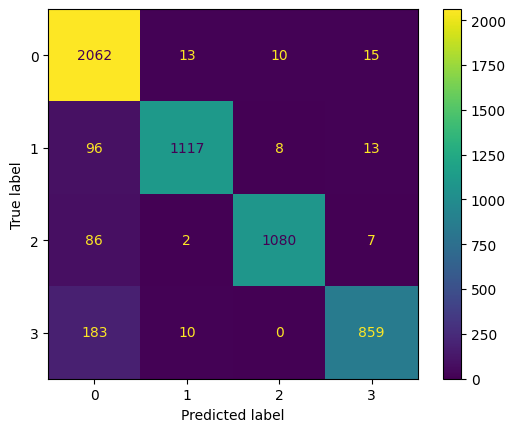

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, y_score, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_x, train_y)  # Training a SVM model on training data

y_pred = svm_classifier.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(test_y, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2100
           1       0.96      0.94      0.95      1234
           2       0.98      0.97      0.97      1175
           3       0.96      0.92      0.94      1052

    accuracy                           0.96      5561
   macro avg       0.96      0.95      0.96      5561
weighted avg       0.96      0.96      0.96      5561



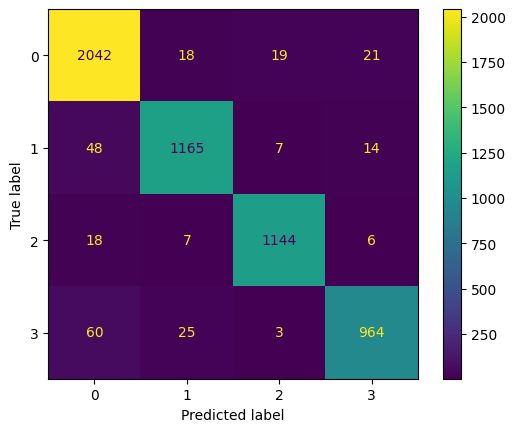

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_x, train_y)  # Training a Random Forest classifier on training data
y_pred = model.predict(test_x)
score = accuracy_score(test_y, y_pred)
print(f"Model Accuracy: {score*100}%")

Model Accuracy: 93.0588023736738%


In [ ]:
classification_rep = classification_report(test_y, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      2100
           1       0.94      0.93      0.94      1234
           2       0.97      0.96      0.96      1175
           3       0.95      0.85      0.90      1052

    accuracy                           0.93      5561
   macro avg       0.94      0.92      0.93      5561
weighted avg       0.93      0.93      0.93      5561



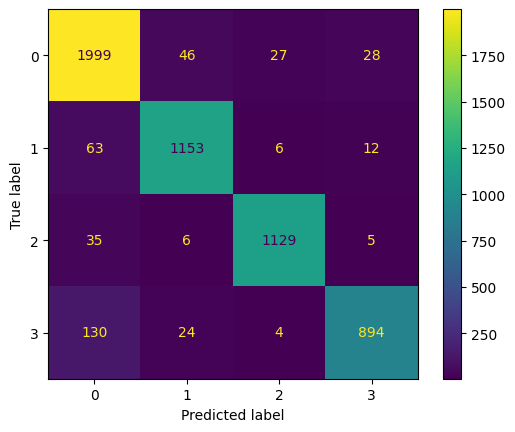

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()

model.fit(train_x, train_y)  # Training a Logistic Regression model on training data

y_pred = model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

classification_rep = classification_report(test_y, y_pred)
print("Classification Report:\n", classification_rep)

Validation Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2100
           1       0.96      0.94      0.95      1234
           2       0.98      0.97      0.97      1175
           3       0.96      0.91      0.93      1052

    accuracy                           0.95      5561
   macro avg       0.96      0.95      0.95      5561
weighted avg       0.95      0.95      0.95      5561



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


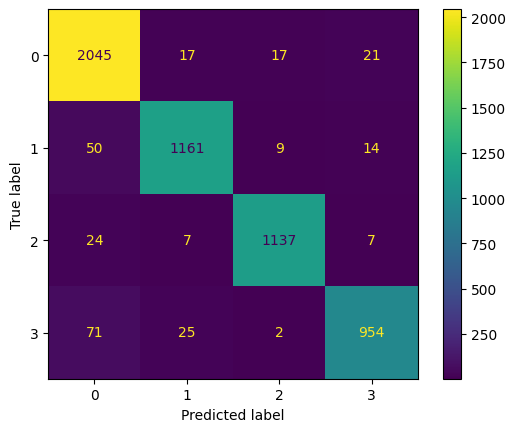

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [ ]:
df.Description.nunique()

27802

In [ ]:
text = df.Description
label = df.Category
from tensorflow import keras
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text)

vocab_size = len(tokenizer.word_index) + 1
vocab_size

92268

In [ ]:
token_to_seq = tokenizer.texts_to_sequences(text)
max_length = 400
padded_text = keras.preprocessing.sequence.pad_sequences(token_to_seq,
                                                         truncating='post',
                                                         padding='post',
                                                         maxlen=max_length)

padded_text[:1]

array([[  325,  3582,    54,  6151,   153,   685,  6332,   241,   404,
          344,  1555,   106,   119,    32,   106,   119,   107,    33,
            3,    48,  1556,    40,    44,     7,  2657,   475,     8,
          844,  2827,   396,    45,   254,   239,  1906,     2, 10101,
         2080,    12,    13,     9,    24,   342,   385,     3,  5673,
           45,   118,    10,   153,   115,   220,     2,   254,     5,
          955,   303,    13,  1556,     9,   562,     4,  1299,    11,
          367,    22,  4133,     4, 10102,    13,   233,  1556,    16,
            9,     5, 11831,  1658,    62,    35,   114,     1,    76,
          311,     2,   870,  1617,   201,    14,    51,  1555,     8,
          114,     1,     2, 10694,     2,  1273,  5517,  8028,     2,
          820,  3640,    13,   785,   380,  1617,  3719,  1184,     7,
          174,     2,  5103,   523,  1555,     3,     1,  1116,    16,
          528,     5,  1955,    62,   396, 14446,     8,   112,  4563,
      